In [1]:
#import packages
from bs4 import BeautifulSoup
import requests 
import pandas as pd

In [2]:
#define webiste url and get content
url = 'https://www.the-numbers.com/market/distributors'
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [3]:
#clean up the html code
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>

In [4]:
#define data as a list
data = []

#find table
results = soup.select('table')[0]

#find all tr elements
rows = results.find_all(['tr'])

#find data in td tags
for row in rows:
    cols = row.find_all('td')
    #get text
    cols = [ele.text.strip() for ele in cols]
    #remove header row
    data.append(cols[1:])

#name columns
cols = ['Distributor', 'Number of Movies', 'Box Office Total', 'Ticket Sales', 'Market Share']
#define dataframe
#remove redundant "Rank" column
df = pd.DataFrame(data[1:], columns = cols)

#return head of table
df.head()

,Distributor,Number of Movies,Box Office Total,Ticket Sales,Market Share
0,Walt Disney,573,"$39,691,885,638","5,668,400,077",16.94%
1,Warner Bros.,803,"$35,638,946,799","5,133,073,907",15.21%
2,Sony Pictures,730,"$28,775,291,704","4,257,930,004",12.28%
3,Universal,511,"$27,464,279,056","3,938,555,708",11.72%
4,20th Century Fox,520,"$25,854,741,898","3,792,361,616",11.03%


In [5]:
df['Number of Movies'] = df['Number of Movies'].astype(int)

df['Box Office Total'] = df['Box Office Total'].str.replace('$', '')
df['Box Office Total'] = df['Box Office Total'].str.replace(',', '')
df['Box Office Total'] = df['Box Office Total'].astype(float)

df['Ticket Sales'] = df['Ticket Sales'].str.replace(',', '')
df['Ticket Sales'] = df['Ticket Sales'].astype(float)

df['Market Share'] = df['Market Share'].str.replace('%', '')
df['Market Share'] = df['Market Share'].astype(float)

df.dtypes

Distributor          object
Number of Movies      int32
Box Office Total    float64
Ticket Sales        float64
Market Share        float64
dtype: object

In [6]:
remaining = df[6:884]
remaining

,Distributor,Number of Movies,Box Office Total,Ticket Sales,Market Share
6,Lionsgate,416,9.538425e+09,1.211612e+09,4.07
7,New Line,207,6.194343e+09,1.116306e+09,2.64
8,Dreamworks SKG,77,4.278649e+09,7.604313e+08,1.83
9,Miramax,384,3.835979e+09,7.140996e+08,1.64
10,MGM,238,3.705595e+09,6.640381e+08,1.58
...,...,...,...,...,...
879,levelFILM,1,1.037000e+03,1.270000e+02,0.00
880,Gunnison Galaxy,1,9.030000e+02,1.040000e+02,0.00
881,Cinevolve Studios,2,8.940000e+02,1.180000e+02,0.00
882,Oilrag Productions,1,8.310000e+02,1.260000e+02,0.00


In [7]:
rem_num_movie = remaining['Number of Movies'].mean()
rem_box_office = remaining['Box Office Total'].mean()
rem_tickets = remaining['Ticket Sales'].mean()
rem_market_share = remaining['Market Share'].mean()*100
print(rem_num_movie)
print(rem_box_office)
print(rem_tickets)
print(rem_market_share)

13.283599088838269
59850738.677676536
9055107.233485194
2.5239179954441995


In [8]:
df = df[1:6]
df

,Distributor,Number of Movies,Box Office Total,Ticket Sales,Market Share
1,Warner Bros.,803,3.563895e+10,5.133074e+09,15.21
2,Sony Pictures,730,2.877529e+10,4.257930e+09,12.28
3,Universal,511,2.746428e+10,3.938556e+09,11.72
4,20th Century Fox,520,2.585474e+10,3.792362e+09,11.03
5,Paramount Pictures,482,2.423592e+10,3.647674e+09,10.34


In [9]:
box_office_per_movie = df['Box Office Total']/df['Number of Movies']
tickets_per_movie = df['Ticket Sales']/df['Number of Movies']
print(box_office_per_movie)
print(tickets_per_movie)

1    4.438225e+07
2    3.941821e+07
3    5.374614e+07
4    4.972066e+07
5    5.028199e+07
dtype: float64
1    6.392371e+06
2    5.832781e+06
3    7.707545e+06
4    7.293003e+06
5    7.567788e+06
dtype: float64


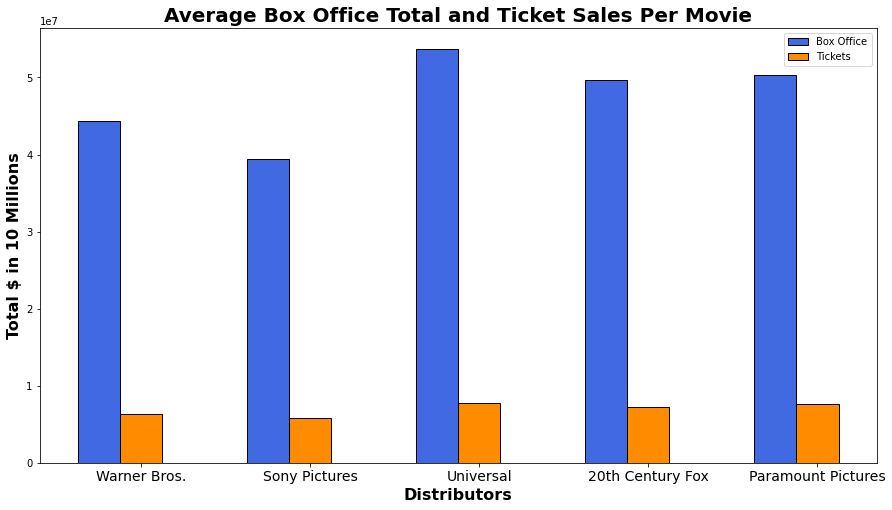

In [23]:
import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.25

bars1 = box_office_per_movie
bars2 = tickets_per_movie

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(15,8))
plt.bar(r1, bars1, color='royalblue', width=barWidth, edgecolor='black', label='Box Office')
plt.bar(r2, bars2, color='darkorange', width=barWidth, edgecolor='black', label='Tickets')

# Add xticks on the middle of the group bars
plt.title('Average Box Office Total and Ticket Sales Per Movie', fontweight='bold', fontsize=20)
plt.xlabel('Distributors', fontweight='bold', fontsize=16)
plt.xticks([r + barWidth for r in range(len(bars1))], ['Warner Bros.', 'Sony Pictures', 'Universal', 
                                                       '20th Century Fox', 'Paramount Pictures'], fontsize=14)
plt.ylabel('Total $ in 10 Millions', fontweight='bold', fontsize=16)

# Create legend & Show graphic
plt.legend()
plt.show()

In [11]:
# Cat's Code
# DON'T RUN THIS CODE UNLESS YOU HAVE 30 MINS
# Skip to "# RUN THIS CODE TO LOAD CAT'S DATA" to get my saved dataframe
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [12]:
# Function to convert money string to integer
def money_str_int(str):
    number = int(str.strip('$').replace(',',''))
    return number

In [13]:
#New Data

def get_table(soup):
    headers = [col.text.strip() for col in soup.findAll('th')] # column names
    headers.append('URL')
    rows = soup.findAll('table')[0].findAll('tr') # retrieve rows
    data = []
    base_url = 'https://www.boxofficemojo.com'

    # Format table data
    for row in rows[1:]:
        # Get list of text displayed on web page
        cell_data = row.findAll('td')
        cells = [cell.text for cell in cell_data] 
        cells[2] = money_str_int(cells[2])

        # Get URL for each movie and append to list
        movie_url = base_url + row.find('a').attrs['href']
        cells.append(movie_url)

        # Add list to data
        data.append(cells)
        
    return pd.DataFrame(data, columns = headers) #return a data frame

In [14]:
url = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/'
base_url = 'https://www.boxofficemojo.com'
df_movie = pd.DataFrame() 

# Get HTML data for top 1000 grossing movies from Box Office Mojo
for i in range(5):
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    fetched_data = get_table(soup)
    if i < 4:
        url = base_url + soup.findAll('li', class_='a-last')[0].find('a').attrs["href"]
    df_movie = df_movie.append(fetched_data, ignore_index = True)
    
df_movie.head()

,Rank,Title,Lifetime Gross,Year,URL
0,1,Star Wars: Episode VII - The Force Awakens,936662225,2015,https://www.boxofficemojo.com/title/tt2488496/...
1,2,Avengers: Endgame,858373000,2019,https://www.boxofficemojo.com/title/tt4154796/...
2,3,Avatar,760507625,2009,https://www.boxofficemojo.com/title/tt0499549/...
3,4,Black Panther,700426566,2018,https://www.boxofficemojo.com/title/tt1825683/...
4,5,Avengers: Infinity War,678815482,2018,https://www.boxofficemojo.com/title/tt4154756/...


In [15]:
# Iterate through above dataframe and pull data from each movie's page
def get_movie_data(url):
    movie_page = requests.get(url)
    movie = BeautifulSoup(movie_page.content, 'html.parser')
    divs = movie.findAll('div', class_='a-section a-spacing-none') #first section of table stored as divs instead of table

    # Variables will come back as 'No Data' if the webpage doesn't have this information
    distributor = 'No Data'
    budget = 'No Data'
    rating = 'No Data'
    duration = 'No Data'
    genres = 'No Data'

    for div in divs:
        spans = div.findAll('span')
        i=0
        for span in spans:      
            if span.text  == 'Domestic Distributor':
                distributor = spans[i+1].text.replace('See full company information\n\n','') #remove extra link text from end
                i+=1
                break
            if span.text == 'Budget':
                budget = money_str_int(spans[i+1].text) #convert budget string to integer
                i+=1
                break
            if span.text == 'MPAA':
                rating = spans[i+1].text
                i+=1
                break
            if span.text == 'Running Time':
                dur = spans[i+1].text.split() #imports duration as hours and minutes
                if len(dur) == 2:
                    dur.extend(['0','0'])
                duration = round( (float(dur[0]) + float(dur[2])/60) , 2) #converts to hours rounded to hundreths
                i+=1
                break
            if span.text == 'Genres':
                genres = spans[i+1].text.replace(' ','').replace('\n\n',',') #.strip wasn't working for some reason
                i+=1
                break
            else:
                i+=1
            
    df_movie = pd.DataFrame([distributor, budget, rating, duration, genres]).transpose()
    df_movie.columns = ['Distributor', 'Budget', 'Rating', 'Running_Time_hrs', 'Genres']

    return df_movie

In [16]:
# loop to get data from first 500 URLs from prior dataframe (broke this up due to timeout issues
df_movie_2 = pd.DataFrame(columns = ['Distributor', 'Budget', 'Rating', 'Running_Time_hrs', 'Genres'])
for url in df_movie['URL'][:500]:
    movie_data = get_movie_data(url)
    df_movie_2 = df_movie_2.append(movie_data, ignore_index=True)
df_movie_2

,Distributor,Budget,Rating,Running_Time_hrs,Genres
0,Walt Disney Studios Motion Pictures,245000000,PG-13,2.3,"Action,Adventure,Sci-Fi"
1,Walt Disney Studios Motion Pictures,356000000,PG-13,3.02,"Action,Adventure,Drama,Sci-Fi"
2,Twentieth Century Fox,237000000,PG-13,2.7,"Action,Adventure,Fantasy,Sci-Fi"
3,Walt Disney Studios Motion Pictures,No Data,PG-13,2.23,"Action,Adventure,Sci-Fi"
4,Walt Disney Studios Motion Pictures,No Data,PG-13,2.48,"Action,Adventure,Sci-Fi"


In [17]:
# loop to add data from last 500 URLs from prior dataframe
for url in df_movie['URL'][500:]:
    movie_data = get_movie_data(url)
    df_movie_2 = df_movie_2.append(movie_data, ignore_index=True)

In [18]:
df_movie_2.columns = ['Distributor', 'Budget', 'Rating', 'Running_Time_hrs', 'Genres']
result = pd.concat([df_movie, df_movie_2], axis=1, join='inner')
result.to_pickle('cats_bomojo_data.pkl')

In [19]:
# RUN THIS CODE TO LOAD CAT'S DATA
df_movie_3 = pd.read_pickle('cats_bomojo_data.pkl')
df_movie_3.head(3)

,Rank,Title,Lifetime Gross,Year,URL,Distributor,Budget,Rating,Running_Time_hrs,Genres
0,1,Star Wars: Episode VII - The Force Awakens,936662225,2015,https://www.boxofficemojo.com/title/tt2488496/...,Walt Disney Studios Motion Pictures,245000000,PG-13,2.3,"Action,Adventure,Sci-Fi"
1,2,Avengers: Endgame,858373000,2019,https://www.boxofficemojo.com/title/tt4154796/...,Walt Disney Studios Motion Pictures,356000000,PG-13,3.02,"Action,Adventure,Drama,Sci-Fi"
2,3,Avatar,760507625,2009,https://www.boxofficemojo.com/title/tt0499549/...,Twentieth Century Fox,237000000,PG-13,2.7,"Action,Adventure,Fantasy,Sci-Fi"


In [20]:
#New Data
url= 'https://www.the-numbers.com/home-market/distributors'
response = requests.get('https://www.the-numbers.com/home-market/distributors')
soup = BeautifulSoup(response.text, 'lxml')
art_body= soup.find_all('table', id = 'page_filling_chart')
for body in art_body:
    print(art_body.text)

In [21]:
df_list = pd.read_html(response.text) 
df = df_list[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Home Market Distributors            613 non-null    object
 1   No. of Movies                       613 non-null    int64 
 2   Total Domestic Home Market Revenue  613 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.5+ KB


In [22]:
df.head()

,Home Market Distributors,No. of Movies,Total Domestic Home Market Revenue
0,Walt Disney Home Entertainment,388,"$10,723,288,338"
1,Universal Home Entertainment,1235,"$9,478,437,927"
2,Warner Home Video,960,"$9,287,470,766"
3,Fox Home Entertainment,855,"$8,862,787,530"
4,Sony Pictures Home Entertainment,1297,"$7,645,687,205"
